## Color By Numbers Code

Importing necessary packages:
1. io for input/output funtionality
2. open-cv for image processing
3. matplotlib for showing picture outputs
4. numpy for numerical calculations
5. PIL for color quantization
6. ipywidgets for file upload functionality(currently i am giving direct path to image but will automate that and hence will require this package)
7. Ipython.display (same as above- it is used to show upload button boxes when using ipywidgets)

In [34]:
import io
import os
import cv2
import numpy as np
from PIL import Image
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display


Importing -> Loading -> Resizing of the image

Processing: ./temp/gass.jpeg


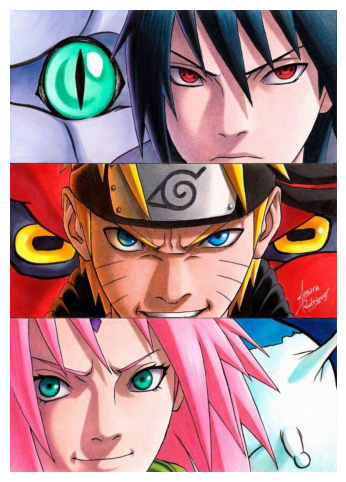

In [35]:
# Function to resize while maintaining aspect ratio
def resize_image(image, max_width=1080, max_height=1920):
    h, w = image.shape[:2]
    scale = min(max_width / w, max_height / h)
    new_size = (int(w * scale), int(h * scale))
    return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

image_path = "./temp/gass.jpeg"      # Importing image

print(f"Processing: {image_path}")

image = cv2.imread(image_path)          # Loading image

# Convert BGR to RGB for correct color display because open cv works in bgr format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# calling resize image
resized_image = resize_image(image)

# Convert back to RGB for display
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Display the resized image
plt.figure(figsize=(6, 6))
plt.imshow(resized_image_rgb)
plt.axis("off")
#plt.title(f"Resized: {os.path.basename(image_path)}")
plt.show()

Pixalate input image in order to make boxes and color quantization in future

In [36]:
def pixelate_image(image, pixel_size=10):
    """Downscale and upscale the image to create a pixelated effect."""
    h, w = image.shape[:2]

    # Downscale and then upscale to enforce pixelation
    small = cv2.resize(image, (w // pixel_size, h // pixel_size), interpolation=cv2.INTER_NEAREST)
    pixelated = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)

    return pixelated

# Apply pixelation
pixelated_image = pixelate_image(resized_image, pixel_size=8)  # Adjust pixel size as needed

# Convert back to RGB for display
pixelated_image_rgb = cv2.cvtColor(pixelated_image, cv2.COLOR_BGR2RGB)

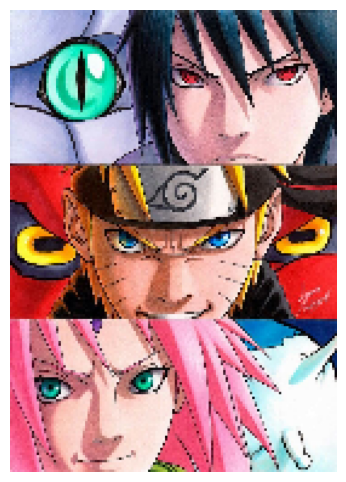

In [37]:

# Display the pixelated image
plt.figure(figsize=(6, 6))
plt.imshow(pixelated_image_rgb)
plt.axis("off")
#plt.title("Pixelated Image")
plt.show()

Performing Color quantization using PIL 

In [ ]:
def quantize_colors(image, desired_num_colors=24):
    """
    Quantizes the input pixelated image using PIL's median cut algorithm.
    image: expected in BGR format as produced by OpenCV.
    Returns:
    - quantized_array: The quantized image as a NumPy array (RGB).
    - palette: A NumPy array of shape (num_colors, 3) with the quantized colors.
    """
    # Convert from BGR to RGB for PIL compatibility
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)

    # Useing median cut algorithm.
    quantized_pil = pil_image.quantize(colors=desired_num_colors, method=Image.MEDIANCUT)

    # Convert back to RGB
    quantized_rgb = quantized_pil.convert('RGB')
    quantized_array = np.array(quantized_rgb)

    # Retrieve the palette used (returned as a flat list)
    raw_palette = quantized_pil.getpalette()[:desired_num_colors * 3]
    palette = np.array(raw_palette).reshape(-1, 3)

    return quantized_array, palette

quantized_image_pil, palette_pil = quantize_colors(pixelated_image, desired_num_colors=24)

In [ ]:
# Applying color quantization
num_colors = 24  # 24 color format
quantized_image, palette = quantize_colors(pixelated_image, desired_num_colors=num_colors)

# Convert back to RGB for display
quantized_image_rgb = cv2.cvtColor(quantized_image.astype('uint8'), cv2.COLOR_BGR2RGB)

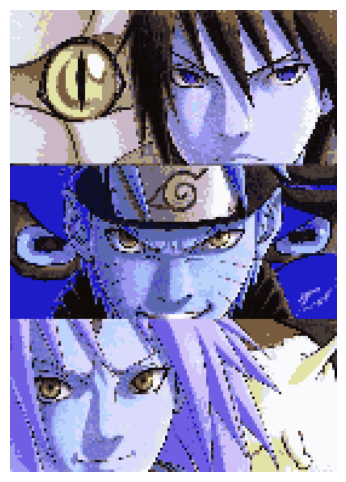

In [40]:
# Display the quantized image
plt.figure(figsize=(6, 6))
plt.imshow(quantized_image_rgb)
plt.axis("off")
#plt.title(f"Quantized Image with {num_colors} Colors")
plt.show()

Importing Pandas for handling tuples/arrays

In [ ]:
import pandas as pd
# Get unique colors and assign numbers
reshaped_img = quantized_image.reshape(-1, 3)
unique_colors, counts = np.unique(reshaped_img, axis=0, return_counts=True)
sorted_colors = [col for _, col in sorted(zip(counts, unique_colors), reverse=True)]
unique_colors = np.array(sorted_colors[:24])  # Picking the 24 most frequent colors
color_map = {tuple(color): idx + 1 for idx, color in enumerate(unique_colors)}

In [42]:
print("Color Map: ",color_map)

Color Map:  {(252, 219, 218): 1, (200, 27, 30): 2, (252, 250, 250): 3, (8, 9, 15): 4, (176, 104, 89): 5, (228, 95, 112): 6, (238, 228, 223): 7, (54, 58, 70): 8, (21, 15, 19): 9, (204, 134, 135): 10, (38, 36, 49): 11, (241, 152, 156): 12, (249, 193, 209): 13, (201, 184, 202): 14, (62, 91, 118): 15, (252, 212, 188): 16, (213, 115, 115): 17, (45, 15, 14): 18, (125, 156, 173): 19, (130, 106, 113): 20, (247, 190, 166): 21, (167, 227, 228): 22, (199, 73, 87): 23, (252, 232, 201): 24}


In [43]:
# Create a numbered version of the image
numbered_image = np.zeros_like(quantized_image[:, :, 0])
# Replace each pixel with its assigned number
for y in range(quantized_image.shape[0]):
    for x in range(quantized_image.shape[1]):
        numbered_image[y, x] = color_map[tuple(quantized_image[y, x])]

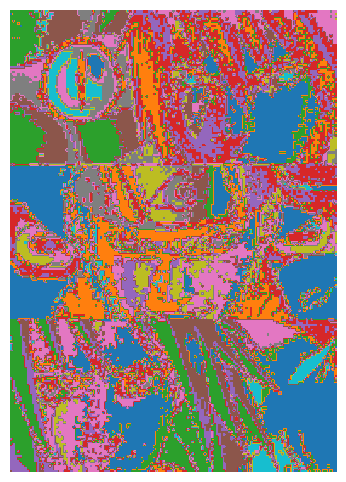

In [44]:
# Display the numbered image
plt.figure(figsize=(6, 6))
plt.imshow(numbered_image, cmap="tab10")  # Use a colormap for visualization
plt.axis("off")
#plt.title("Color by Numbers Template (Numbers Only)")
plt.show()

In [45]:
# Display the color map as a reference
color_df = pd.DataFrame({"Color Index": list(color_map.values()), "RGB Value": list(color_map.keys())})
print("Color Mapping (Use this to match numbers with colors):")
display(color_df)

Color Mapping (Use this to match numbers with colors):


,Color Index,RGB Value
0,1,"(252, 219, 218)"
1,2,"(200, 27, 30)"
2,3,"(252, 250, 250)"
3,4,"(8, 9, 15)"
4,5,"(176, 104, 89)"
5,6,"(228, 95, 112)"
6,7,"(238, 228, 223)"
7,8,"(54, 58, 70)"
8,9,"(21, 15, 19)"
9,10,"(204, 134, 135)"


Making grids: Giving grid dimension and layout

In [ ]:
def create_grid_image(image):
    """Create a grid of numbered boxes over the image."""
    h, w = image.shape[:2]

    box_size = min(h // 40, w // 60)
    box_h, box_w = box_size, box_size
    grid_h, grid_w = h // box_size, w // box_size


    # Create a blank canvas for the final grid
    grid_image = np.ones_like(image, dtype=np.uint8) * 255

    # Font settings
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = min(box_w, box_h) / 50
    thickness = 1

    # Loop through each grid cell
    for i in range(grid_h):
        for j in range(grid_w):
            # Extract the region
            y1, y2 = i * box_h, (i + 1) * box_h
            x1, x2 = j * box_w, (j + 1) * box_w
            box_region = image[y1:y2, x1:x2]

            # Find the most common color in the box
            unique, counts = np.unique(box_region.reshape(-1, 3), axis=0, return_counts=True)
            dominant_color = unique[np.argmax(counts)]
            dominant_color_tuple = tuple(map(int, dominant_color))

            # Assign a number based on color map
            num = color_map.get(tuple(dominant_color_tuple), 0)

            # Draw grid and number
            cv2.rectangle(grid_image, (x1, y1), (x2, y2), (0, 0, 0), 1)
            text_size = cv2.getTextSize(str(num), font, font_scale, thickness)[0]
            text_x = x1 + (box_w - text_size[0]) // 3
            text_y = y1 + (box_h + text_size[1]) // 3
            cv2.putText(grid_image, str(num), (text_x, text_y), font, font_scale, (0, 0, 0), thickness)


    return grid_image

# Generate the grid image
grid_image = create_grid_image(quantized_image)

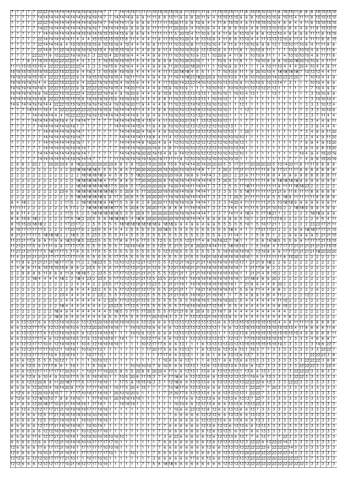

In [47]:
# Display the final grid
plt.figure(figsize=(6, 6))
plt.imshow(grid_image)
plt.axis("off")
#plt.title("Numbered Grid Image")
plt.show()

Adding color palette to the bottom of page for color reference

In [ ]:
def add_color_key_below(grid_image, color_map, box_size=50, num_colors=24):
    """Add a color key with boxes arranged below the grid image."""
    # Get grid image dimensions
    grid_h, grid_w = grid_image.shape[:2]

    # Define number of color boxes per row
    colors_per_row = min(num_colors, len(color_map))  # Avoid exceeding actual colors
    box_w = grid_w // colors_per_row  # Adjust width of each color box

    # Calculate new image height (add space for the color key)
    final_image_height = grid_h + box_size

    final_image = np.ones((final_image_height, grid_w, 3), dtype=np.uint8) * 255

    # Place the grid image at the top
    final_image[:grid_h, :] = grid_image

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    thickness = 1

    colors_list = list(color_map.items())[:num_colors]  # Limit to num_colors

    for i, (color, number) in enumerate(colors_list):
        # Define box position
        x1, x2 = i * box_w, (i + 1) * box_w
        y1, y2 = grid_h, final_image_height

        final_image[y1:y2, x1:x2] = color

        # Draw number inside the box
        text_size = cv2.getTextSize(str(number), font, font_scale, thickness)[0]
        text_x = x1 + (box_w - text_size[0]) // 2
        text_y = y1 + (box_size + text_size[1]) // 2 - 10
        cv2.putText(final_image, str(number), (text_x, text_y), font, font_scale, (0, 0, 0), thickness)

    return final_image

# Apply the function
final_image_with_key = add_color_key_below(grid_image, color_map)

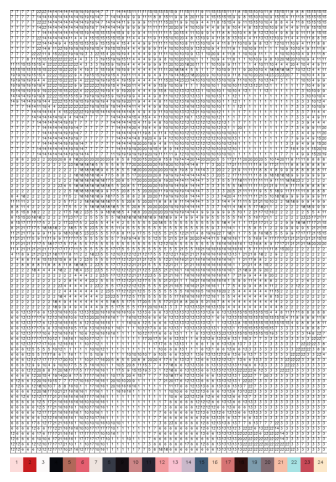

In [49]:
# Display the final image with color key
plt.figure(figsize=(12, 6))
plt.imshow(final_image_with_key)
plt.axis("off")
#plt.title("Final Image with Color Key")
plt.show()

Importing random to randomly giving name to the output file and and saving output image to a new folder named "output_images"

In [ ]:
import random

# Create a folder named 'output_images' in the current directory
output_dir = os.path.join(os.getcwd(), "output_images")
os.makedirs(output_dir, exist_ok=True)

# Generate a random number between 1 and 1000
random_number = random.randint(1, 1000)

# Construct the output file name and path
output_filename = f"{random_number}.png"
output_path = os.path.join(output_dir, output_filename)

plt.imsave(output_path, final_image_with_key)

print(f"Image saved as '{output_filename}' in folder: {output_dir}")

Image saved as '23.png' in folder: d:\Projects\Color_By_Num\output_images
